In [1]:
import librosa #Here we are using librosa library
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa.display

In [2]:
filename='../UrbanSound8K/audio/fold1/101415-3-0-3.wav'
data,sample_rate=librosa.load(filename)
data

array([-0.0006054 , -0.00103819, -0.00084194, ..., -0.00025103,
       -0.00023995, -0.00033281], dtype=float32)

In [3]:
sample_rate

22050

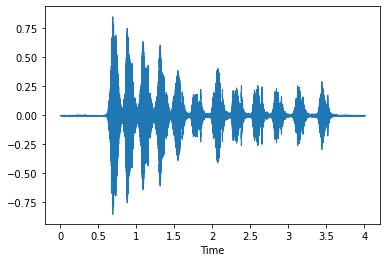

In [4]:
#Showing wave of the audio data
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

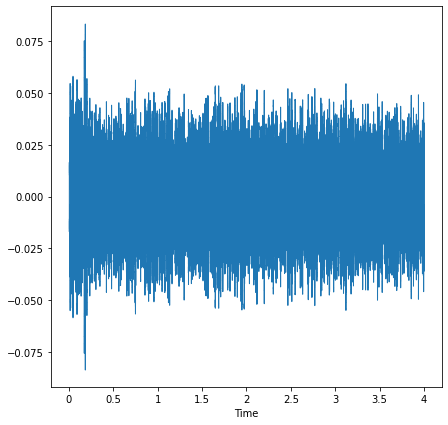

In [5]:
#Same as previous but audio data is different
file='../UrbanSound8K/audio/fold9/103249-5-0-10.wav'
plt.figure(figsize=(7,7))
data,sample_rate=librosa.load(file)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(file)

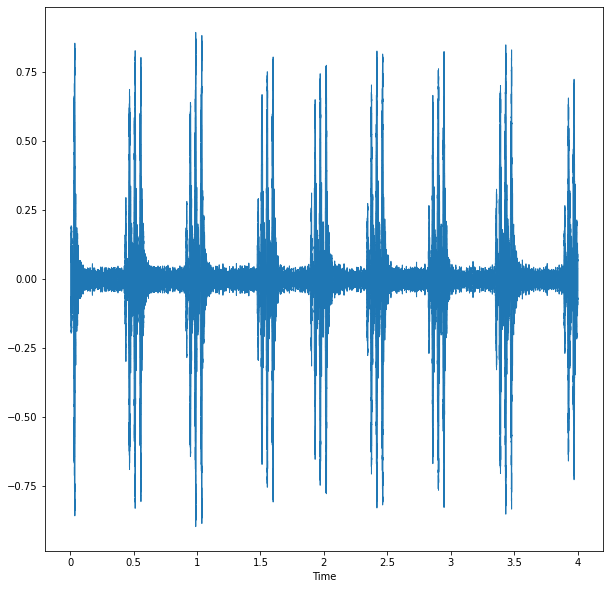

In [6]:
#Same as previous
file='../UrbanSound8K/audio/fold9/101729-0-0-24.wav'
plt.figure(figsize=(10,10))
data,sample_rate=librosa.load(file)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(file)

In [7]:
#Reading the data
import pandas as pd
metadata=pd.read_csv("../UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [8]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [9]:
file='../UrbanSound8K/audio/fold10/100648-1-1-0.wav'
data,sample_rate=librosa.load(file)
print(data)

[ 0.          0.          0.         ... -0.02467388 -0.01529006
  0.        ]


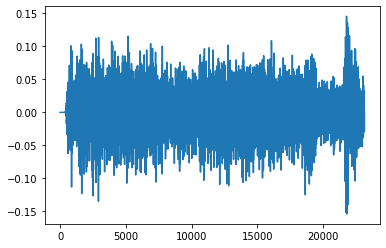

In [10]:
plt.plot(data)

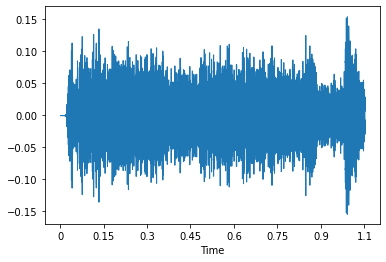

In [11]:
librosa.display.waveshow(data,sr=sample_rate)

In [12]:
ipd.Audio(file)

In [13]:
#Mfccs- mel-frequency crapstral coefficients
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate)
mfccs

array([[-3.81742462e+02, -2.39318420e+02, -2.00840012e+02,
        -1.97661453e+02, -1.90769394e+02, -1.82279953e+02,
        -1.86303940e+02, -1.90227814e+02, -1.95716705e+02,
        -2.02454849e+02, -2.00424805e+02, -1.97105774e+02,
        -1.94880600e+02, -1.93831757e+02, -1.98339737e+02,
        -2.00449799e+02, -1.98790314e+02, -1.97436707e+02,
        -1.95979141e+02, -2.00547958e+02, -1.99036469e+02,
        -1.88400238e+02, -1.81872223e+02, -1.83758835e+02,
        -1.74160706e+02, -1.70869598e+02, -1.77896194e+02,
        -1.80679962e+02, -1.83027191e+02, -1.85226685e+02,
        -1.83254913e+02, -1.84969193e+02, -1.90951385e+02,
        -1.99425110e+02, -2.02100281e+02, -2.04698502e+02,
        -2.01852585e+02, -1.98343140e+02, -2.08632095e+02,
        -2.24525192e+02, -2.22252625e+02, -2.10369354e+02,
        -1.82475296e+02, -1.65149979e+02, -1.82791977e+02,
        -2.31846603e+02],
       [ 1.02776894e+02,  1.09745834e+02,  1.12533859e+02,
         1.15133636e+02,  1.17

In [14]:
mfccs.shape

(20, 46)

In [15]:
audio_data_path='../UrbanSound8K/audio'

In [16]:
#Calulating mfcc for all the audio data
def features_extractor(file):
    audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [17]:
import numpy as np
from tqdm import tqdm
import os as o
extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    file_name=o.path.join(o.path.abspath(audio_data_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_labels=row['class']
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [11:54,  4.89it/s]C:\Users\Partha10\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [27:41,  7.52it/s]C:\Users\Partha10\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8329it [27:41, 13.66it/s]C:\Users\Partha10\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [28:57,  5.03it/s]


In [18]:
#Converting extracted_features into a dataframe
df=pd.DataFrame(extracted_features,columns=['features','class'])
df.head()

features             class
0  [-217.35526, 70.22338, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing
3  [-413.89984, 101.66373, -35.42945, 53.036354, ...  children_playing
4  [-446.60352, 113.68541, -52.402206, 60.302044,...  children_playing

In [19]:
df.shape

(8732, 2)

In [20]:
#Dividing the data into train and test
x=np.array(df['features'].tolist())
y=np.array(df['class'].tolist())

In [21]:
x

array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
        -1.6930529e+00, -6.1698371e-01,  3.8600543e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489321e-01, -5.4468727e-01,  4.4632098e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962963e+00, -9.6140963e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941563e+01, ...,
        -3.0292380e+00,  2.7170298e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082441e+00, -1.6414586e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386460e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [22]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [23]:
print(x.shape)
print(y.shape)

(8732, 40)
(8732,)


In [24]:
print(x.mean(),x.std())

-3.4118054 47.55431


In [25]:
#Applying label encoding to y
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=to_categorical(le.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6112, 40) (2620, 40) (6112, 10) (2620, 10)


In [28]:
x_train

array([[-1.57350021e+02,  1.15588051e+02, -2.14230347e+01, ...,
         3.16733861e+00, -3.04234433e+00,  3.54878092e+00],
       [-2.09228485e+02,  1.11860794e+02,  1.03030324e+00, ...,
        -2.17160273e+00, -2.29007214e-01, -4.67459440e-01],
       [-4.51796150e+01,  4.98147125e+01, -8.36344604e+01, ...,
         1.42047846e+00, -1.16438672e-01,  7.28929663e+00],
       ...,
       [-1.55853027e+02,  5.94358368e+01, -4.64619789e+01, ...,
         3.92089397e-01, -1.34392726e+00, -7.58475542e-01],
       [-3.98861084e+01,  6.97527542e+01, -7.62685242e+01, ...,
         1.79391468e+00,  3.07987720e-01,  4.57526016e+00],
       [-1.99917130e+02,  1.55984024e+02, -2.79097443e+01, ...,
        -6.31891727e-01,  1.56685257e+00,  1.43908367e-01]], dtype=float32)

In [29]:
x_train.shape

(6112, 40)

In [30]:
x_test.shape

(2620, 40)

In [31]:
y_train.shape

(6112, 10)

In [46]:
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [47]:
#Building the model
nn=models.Sequential([
    
    layers.Dense(99,input_shape=(40,),activation='relu'),
    layers.Dense(34,activation='relu'),
    layers.Dense(10,activation='softmax')
    
    
    
])

In [48]:
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 99)                4059      
                                                                 
 dense_1 (Dense)             (None, 34)                3400      
                                                                 
 dense_2 (Dense)             (None, 10)                350       
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Fitting the model with x_train and y_train

nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 25
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

nn.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

Epoch 1/25
189/191 [============================>.] - ETA: 0s - loss: 5.0401 - accuracy: 0.3108
Epoch 1: val_loss improved from inf to 1.75900, saving model to saved_models\audio_classification.hdf5
191/191 [==============================] - 9s 14ms/step - loss: 5.0087 - accuracy: 0.3107 - val_loss: 1.7590 - val_accuracy: 0.4069
Epoch 2/25
187/191 [============================>.] - ETA: 0s - loss: 1.4931 - accuracy: 0.5070
Epoch 2: val_loss improved from 1.75900 to 1.38903, saving model to saved_models\audio_classification.hdf5
191/191 [==============================] - 2s 10ms/step - loss: 1.4896 - accuracy: 0.5082 - val_loss: 1.3890 - val_accuracy: 0.5271
Epoch 3/25
188/191 [============================>.] - ETA: 0s - loss: 1.2930 - accuracy: 0.5657
Epoch 3: val_loss improved from 1.38903 to 1.26209, saving model to saved_models\audio_classification.hdf5
191/191 [==============================] - 2s 12ms/step - loss: 1.2932 - accuracy: 0.5664 - val_loss: 1.2621 - val_accuracy: 0.5901

In [50]:
nn.evaluate(x_test,y_test)

82/82 [==============================] - 1s 12ms/step - loss: 0.7013 - accuracy: 0.7840


[0.7012639045715332, 0.7839694619178772]

In [51]:
x_test[0]

array([-1.9444672e+02,  4.1043793e+01, -5.6290642e+01,  2.7369333e+01,
       -1.1237228e+00,  1.5498430e+01, -1.1715335e+01,  2.2648161e+01,
       -7.2369151e+00,  1.7877579e+01, -5.2971740e+00,  3.1020286e+00,
       -9.6709509e+00, -5.1064905e-02,  5.6657499e-01,  1.4434387e+01,
       -3.9203453e+00,  9.4339256e+00, -1.4125997e+01,  9.6006718e+00,
       -8.5956593e+00,  5.9857283e+00, -1.7877175e+00,  5.6232681e+00,
       -1.2145979e+00, -6.9502264e-01, -2.6024265e+00,  2.4845710e+00,
       -6.0475779e+00,  3.8285391e+00, -1.3620766e+00,  3.6820745e-01,
       -5.3007406e-01, -8.3572555e-01, -1.4809396e+00,  1.0731579e+00,
        8.9777552e-02,  1.5400956e+00,  2.6199803e-01, -2.0243169e-01],
      dtype=float32)

In [52]:
filename="../UrbanSound8K/audio/fold1/101415-3-0-2.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
y_pred=nn.predict(prediction_feature)
y_pred

1/1 [==============================] - 0s 216ms/step


array([[1.10535964e-01, 7.70413816e-01, 3.47139463e-02, 4.36754577e-04,
        3.75004136e-04, 4.66982689e-04, 2.07918492e-04, 2.95665413e-02,
        2.82515225e-06, 5.32803126e-02]], dtype=float32)

In [53]:
np.argmax(y_pred,axis=1)

array([1], dtype=int64)

In [54]:
#Testing with some random audio data
filename="../UrbanSound8K/audio/fold10/101382-2-0-20.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=nn.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[-2.9286816e+02  7.6148514e+01 -8.9283424e+01 -1.7439634e+01
 -3.5680813e+01 -2.1628220e+01 -2.3610411e+01 -1.7398737e+01
 -1.9349104e+01 -2.0335125e+01 -1.8246511e+01  6.0138440e+00
 -1.1755315e+01  4.6790996e-01 -5.9090028e+00 -1.2833010e-01
 -7.0852594e+00  8.7631702e-01 -5.6806293e+00 -6.3838940e+00
 -7.8490171e+00 -5.1395899e-01 -2.5704172e+00 -8.5713559e-01
 -3.8996727e+00 -1.2656254e+00 -4.9632006e+00 -3.8195801e+00
  2.9782121e+00 -1.1003335e+00  4.5313564e-01  4.1021395e+00
  2.5452669e+00  2.0834954e+00  1.1725208e+00  3.1504326e+00
  2.4951208e+00  1.8432282e+00  1.5362170e+00 -6.5870559e-01]
[[-2.9286816e+02  7.6148514e+01 -8.9283424e+01 -1.7439634e+01
  -3.5680813e+01 -2.1628220e+01 -2.3610411e+01 -1.7398737e+01
  -1.9349104e+01 -2.0335125e+01 -1.8246511e+01  6.0138440e+00
  -1.1755315e+01  4.6790996e-01 -5.9090028e+00 -1.2833010e-01
  -7.0852594e+00  8.7631702e-01 -5.6806293e+00 -6.3838940e+00
  -7.8490171e+00 -5.1395899e-01 -2.5704172e+00 -8.5713559e-01
  -3.8996727e+00 

array(['children_playing'], dtype='<U16')

In [55]:
ipd.Audio(filename)

In [56]:
#Testing with some audio data
x='../UrbanSound8K/audio/fold10/100648-1-0-0.wav'
audio, sample_rate = librosa.load(x, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=nn.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[-196.822       113.993126    -13.813408      0.4022098   -20.145586
   -4.7625513   -40.68413       4.171539    -18.973984     -3.0413852
  -19.736597      7.505515    -21.69197      -4.053084    -20.116354
    4.8145556   -14.817319      0.9286656   -14.061541      8.725959
   -6.6515527     6.45562      -4.6819024     0.5490027    -9.6971445
   -0.34578848   -8.687981     -0.67337924   -6.8771744     5.059755
  -10.099091     -0.25963083   -2.8073726     4.441565     -7.439074
   -4.4811225    -1.9385126     3.842505     -5.9479365    -0.9880176 ]
[[-196.822       113.993126    -13.813408      0.4022098   -20.145586
    -4.7625513   -40.68413       4.171539    -18.973984     -3.0413852
   -19.736597      7.505515    -21.69197      -4.053084    -20.116354
     4.8145556   -14.817319      0.9286656   -14.061541      8.725959
    -6.6515527     6.45562      -4.6819024     0.5490027    -9.6971445
    -0.34578848   -8.687981     -0.67337924   -6.8771744     5.059755
   -10.099091     -0.

array(['street_music'], dtype='<U16')

In [57]:
ipd.Audio(x)

In [58]:
#Testing with random audio data
y='../UrbanSound8K/audio/fold10/100648-1-1-0.wav'
audio, sample_rate = librosa.load(y, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=nn.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[-203.38026    110.47649    -27.654587    13.878089   -25.771694
  -11.791375   -24.84813      3.826014   -27.55837      9.07529
  -20.859709     5.4129763  -24.00172      5.662438   -13.73274
   -3.0151746  -14.304382    -1.2490004  -14.489137     3.142862
  -11.586273     3.9236944   -8.836533    -1.4830024   -6.2751427
   -1.2972062   -8.606145     0.5964239   -9.304495     3.5240953
    0.5034145   -2.811972    -2.8778977    5.0855837   -8.883842
   -5.634365     6.706231     2.3156214  -13.47779      3.2116613]
[[-203.38026    110.47649    -27.654587    13.878089   -25.771694
   -11.791375   -24.84813      3.826014   -27.55837      9.07529
   -20.859709     5.4129763  -24.00172      5.662438   -13.73274
    -3.0151746  -14.304382    -1.2490004  -14.489137     3.142862
   -11.586273     3.9236944   -8.836533    -1.4830024   -6.2751427
    -1.2972062   -8.606145     0.5964239   -9.304495     3.5240953
     0.5034145   -2.811972    -2.8778977    5.0855837   -8.883842
    -5.634365   

array(['jackhammer'], dtype='<U16')

In [59]:
ipd.Audio(y)

In [60]:
v='../UrbanSound8K/audio/fold1/101415-3-0-2.wav'
audio, sample_rate = librosa.load(v, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=nn.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[-4.0345078e+02  9.3772453e+01  1.7812965e+01 -1.1735518e+01
 -7.2203593e+00  3.7652965e+00 -1.6174644e+01 -6.8593187e+00
 -1.0542680e+01 -5.1888270e+00  4.1709777e-02 -4.9357162e+00
  9.3806291e-01  1.2813913e+00  4.6511593e-01  6.1276875e+00
  2.8408837e+00  3.2279251e+00 -4.2884703e+00 -3.6228056e+00
 -1.8678910e+00 -3.1442459e+00 -3.5220666e+00 -5.6707935e+00
 -1.8247038e+00 -2.4657433e+00 -2.8244350e+00  7.6614864e-02
 -5.8698869e-01 -1.0786019e-01 -8.9683533e-01 -1.0526062e+00
 -2.6228969e+00 -5.0490880e-01 -1.9731140e+00 -2.9963646e+00
 -3.0717986e+00 -1.4866259e+00 -2.4471817e+00 -2.8644507e+00]
[[-4.0345078e+02  9.3772453e+01  1.7812965e+01 -1.1735518e+01
  -7.2203593e+00  3.7652965e+00 -1.6174644e+01 -6.8593187e+00
  -1.0542680e+01 -5.1888270e+00  4.1709777e-02 -4.9357162e+00
   9.3806291e-01  1.2813913e+00  4.6511593e-01  6.1276875e+00
   2.8408837e+00  3.2279251e+00 -4.2884703e+00 -3.6228056e+00
  -1.8678910e+00 -3.1442459e+00 -3.5220666e+00 -5.6707935e+00
  -1.8247038e+00 

array(['dog_bark'], dtype='<U16')

In [61]:
ipd.Audio(v)